In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv


In [3]:
df = pd.read_csv("/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.shape

(10000, 6)

In [5]:
# checking for null values
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [6]:
# checking for duplicate values
df.duplicated().sum()

127

In [7]:
# we need to remove this duplicated records from original dataset
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [8]:
df.shape # (as 127 records are removed )

(9873, 6)

In [9]:
# converting this "Extracurricular Activities" from categorical to numerical 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Extracurricular Activities'] = le.fit_transform(df['Extracurricular Activities'])

In [10]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [11]:
from sklearn.model_selection import train_test_split

# train test split
X = df.drop(columns=['Performance Index'],axis=1)
y = df['Performance Index']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
# also we could see that the dataset is not scaled - using StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [13]:
X_train_scaled

array([[ 0.00372078,  0.09653565, -0.99394087, -1.49715301, -0.20890687],
       [-1.15628182, -0.71266303,  1.00609607,  0.26840261, -1.25715748],
       [-1.54294935, -1.17506228, -0.99394087, -1.49715301, -1.60657435],
       ...,
       [ 0.00372078,  1.48373339,  1.00609607, -0.90863447,  0.48992687],
       [-1.54294935, -1.29066209, -0.99394087,  1.44543968, -1.60657435],
       [ 1.55039091,  0.84793443, -0.99394087,  0.85692114,  0.14051   ]])

In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [15]:
y_pred = lr.predict(X_test_scaled)

In [16]:
# as we know this is Multiple LR, so we will calculate matrics like MAE,MSE,RMSE,R^2 score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Mean Squared Error: ",mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred))
print("R2 Score: ",r2_score(y_test, y_pred))
print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test, y_pred)))


Mean Squared Error:  4.305900938538473
Mean Absolute Error: 1.6469703984255564
R2 Score:  0.9884301209927054
Root mean squared error:  2.075066490148803


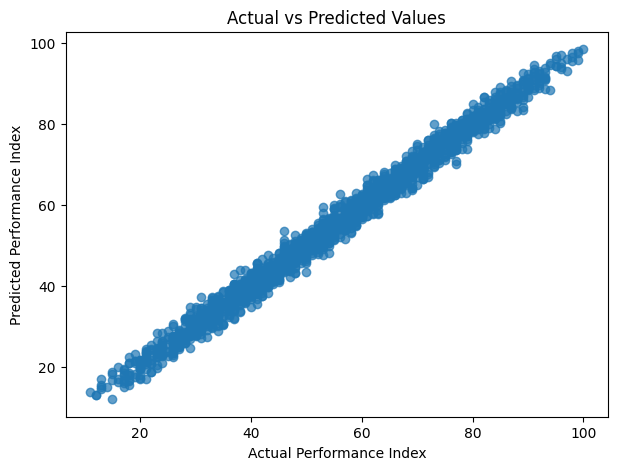

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs Predicted Values")
plt.show()
